In [2]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import random
import csv
import json

In [19]:
# Dividiere die Werte des Dummy-Heizwärmebedarfs durch 2.5
file = '../data/preprocessing/demands/testing/heat_demand_dummy.json'

with open(file, 'r') as f:
    data = json.load(f)

divided_heat_demand = {hour: demand / 2.5 for hour, demand in data['heat_demand'].items()}

# Erstelle das neue Dictionary mit den geteilten Werten
divided_heat_demand_json = {"heat_demand": divided_heat_demand}

# Pfad, um die geteilten Werte zu speichern (du kannst den Pfad ändern, wenn du die Datei umbenennen möchtest)
output_file_path = '../data/preprocessing/demands/testing/heat_demand_dummy_2.json'

# Speichern der geteilten Daten in einer neuen JSON-Datei
with open(output_file_path, 'w') as output_file:
    json.dump(divided_heat_demand_json, output_file, indent=4)

print(f"Die geteilten Werte wurden in {output_file_path} gespeichert.")


Die geteilten Werte wurden in ../data/preprocessing/demands/testing/heat_demand_dummy_2.json gespeichert.


In [20]:
# Dividiere die Werte der Dummy-Heizwärmebedarfs-Szenarien durch 2.5
file_path = '../data/preprocessing/demands/testing/heat_demand_scenarios_dummy.json'

# Lade die JSON-Daten
with open(file_path, 'r') as file:
    heat_demand_data = json.load(file)

# Funktion, um alle numerischen Werte (außer 'Probability') durch 2 zu teilen
def divide_heat_demand_by_2(scenario_data):
    divided_data = {}
    for key, value in scenario_data.items():
        if key == 'Probability':
            divided_data[key] = value  # Probability bleibt unverändert
        else:
            divided_data[key] = value / 2.5  # Alle anderen Werte durch 2 teilen
    return divided_data

# Alle Szenarien durchgehen und die Werte durch 2 teilen
divided_heat_demand_scenarios = {}
for scenario, data in heat_demand_data.items():
    divided_heat_demand_scenarios[scenario] = divide_heat_demand_by_2(data)

# Pfad, um die geteilten Werte zu speichern
output_file_path = '../data/preprocessing/demands/testing/heat_demand_scenarios_dummy_2.json'

# Speichern der geteilten Daten in einer neuen JSON-Datei
with open(output_file_path, 'w') as output_file:
    json.dump(divided_heat_demand_scenarios, output_file, indent=4)

print(f"Die geteilten Werte wurden in {output_file_path} gespeichert.")

Die geteilten Werte wurden in ../data/preprocessing/demands/testing/heat_demand_scenarios_dummy_2.json gespeichert.


In [4]:
#Paths
INPUT_PATH = '../data/input/raw/'
OUTPUT_PATH = '../data/output/preprocessing/'


# Load the dataset
dataset = pd.read_csv(INPUT_PATH + '240624_validation_data.csv')

# Select the date for which you want to extract the data
selected_date = '2023-04-01'

# Number of scenarios to generate
num_scenarios = 50


In [5]:
# Extract the time, forecasted demand and actual demand
time = dataset['time']
time = pd.to_datetime(time, utc=True)
forecast_demand = dataset['predicted heat']
actual_demand = dataset['delivered heat']

# Create a dataframe with the necessary columns
df_data = pd.DataFrame({'time' : time, 'actual_demand': actual_demand, 'forecast_demand': forecast_demand})
df_data['hour']=time.dt.hour

# Calculate the error and absolute error
df_data['error']= df_data['actual_demand'] - df_data['forecast_demand']

# Calculate the mean of the error for whole dataset
mu_all = df_data['error'].mean()
sigma_all = df_data['error'].std()
print('Mean of of the error of each hour:', mu_all)
print('Standard deviation of the mean of the error of each hour:', sigma_all)

df_data

Mean of of the error of each hour: -8.39020298257356
Standard deviation of the mean of the error of each hour: 31.42172005784749


,time,actual_demand,forecast_demand,hour,error
0,2023-03-02 16:00:00+00:00,254.990005,255.590651,16,-0.600646
1,2023-03-02 17:00:00+00:00,187.787503,237.501176,17,-49.713673
2,2023-03-02 18:00:00+00:00,230.629171,264.220971,18,-33.591800
3,2023-03-02 19:00:00+00:00,233.329169,236.491860,19,-3.162691
4,2023-03-02 20:00:00+00:00,222.775003,216.179837,20,6.595167
...,...,...,...,...,...
2996,2023-07-12 19:00:00+00:00,55.804167,51.912949,19,3.891219
2997,2023-07-12 20:00:00+00:00,14.191667,37.334409,20,-23.142742
2998,2023-07-12 21:00:00+00:00,22.533334,37.278034,21,-14.744700
2999,2023-07-12 22:00:00+00:00,15.287500,37.703201,22,-22.415700


In [6]:
# Calculate the mean and standard deviation of the error of each hour of a day. 
error = df_data.groupby('hour')['error'].agg(['mean', 'std']).reset_index()
error  = error.rename(columns={'mean': 'mu', 'std': 'sigma'})

# Save the error data to a dictionary
error_dict = error.set_index('hour').to_dict(orient='index')

# Print the error dictionary
error_dict


{0: {'mu': -12.731658021190215, 'sigma': 25.018753157221795},
 1: {'mu': -8.717701939869812, 'sigma': 25.787822594592562},
 2: {'mu': 38.62809145641247, 'sigma': 40.06221098717317},
 3: {'mu': -11.219355528775246, 'sigma': 35.89610812413864},
 4: {'mu': 4.6619634940865975, 'sigma': 29.89150310430875},
 5: {'mu': -3.1503448513536596, 'sigma': 30.62503489088334},
 6: {'mu': -11.665524616604312, 'sigma': 28.687483429676817},
 7: {'mu': -8.965185204385374, 'sigma': 30.89163216771525},
 8: {'mu': -4.254730131452734, 'sigma': 29.0944311173442},
 9: {'mu': -9.849400683302798, 'sigma': 33.982800569041345},
 10: {'mu': -16.93716965553407, 'sigma': 31.972997351520558},
 11: {'mu': -11.808679656691835, 'sigma': 27.301664271959485},
 12: {'mu': -14.417149987864374, 'sigma': 29.132160670687032},
 13: {'mu': -11.036739802937781, 'sigma': 27.055038468354763},
 14: {'mu': -14.235238982654698, 'sigma': 29.627671262886945},
 15: {'mu': -12.303575238253774, 'sigma': 33.18363957415679},
 16: {'mu': -7.271

In [7]:
# Extract the data for the selected date
daily_date = df_data[df_data['time'].dt.date == pd.to_datetime(selected_date).date()].reset_index(drop=True)
daily_date = daily_date[['time', 'hour', 'actual_demand', 'forecast_demand', 'error']]
if(len(daily_date)==24):
    print('The selected date has 24 hours')
else:
    print('The selected date does not have 24 hours')
daily_date

The selected date has 24 hours


,time,hour,actual_demand,forecast_demand,error
0,2023-04-01 00:00:00+00:00,0,45.141668,79.256436,-34.114768
1,2023-04-01 01:00:00+00:00,1,71.408335,88.850384,-17.442050
2,2023-04-01 02:00:00+00:00,2,234.970838,166.624694,68.346144
3,2023-04-01 03:00:00+00:00,3,146.212502,113.137177,33.075326
4,2023-04-01 04:00:00+00:00,4,131.770836,118.939521,12.831315
5,2023-04-01 05:00:00+00:00,5,129.470836,124.614834,4.856001
6,2023-04-01 06:00:00+00:00,6,160.633337,125.941581,34.691755
7,2023-04-01 07:00:00+00:00,7,168.050002,118.988194,49.061808
8,2023-04-01 08:00:00+00:00,8,162.475003,113.102637,49.372366
9,2023-04-01 09:00:00+00:00,9,96.350001,103.574392,-7.224391


---

## First Methode

In [8]:
# Generate scenarios for the selected date
forecast_demand = daily_date['forecast_demand']

scenarios = np.zeros((num_scenarios, 24))


for i in range(len(daily_date)):
    mu = error_dict[i]['mu']
    sigma = error_dict[i]['sigma']
    print('Hour:', i, 'Mean:', mu, 'Standard deviation:', sigma)

    # Generate hourly scenarios using normal distribution
    hourly_scenarios = np.random.normal(mu, sigma, num_scenarios)
    print('Hourly scenarios:', hourly_scenarios)
    scenarios[:, i] = forecast_demand[i] + hourly_scenarios
    
scenarios_df = pd.DataFrame(scenarios)




Hour: 0 Mean: -12.731658021190215 Standard deviation: 25.018753157221795
Hourly scenarios: [-27.39683647  -3.78714689 -32.77236871  -8.63225029 -36.0356795
   6.54992238 -16.0105883  -12.33993752   8.52870639   8.64223963
  -5.9419279  -18.71275606 -33.72348495 -26.239833    -7.10076723
 -16.26985089  -6.45349576  -8.99956026  -2.64857016 -37.41675704
  -0.28386366  -1.47624621 -24.07195038 -12.67368143   4.3159188
 -18.62848746 -34.13318396   6.14659184  13.3120521  -14.87118534
 -21.34180654  -0.69105396 -25.48201657  56.14756045   6.21739236
 -27.92654123 -25.41747554 -28.58584311  10.69765514 -27.0279894
  11.78810548 -40.75323485 -28.8444127    7.20378152  21.48318753
   7.18459371   3.34038496 -37.05114782 -79.97833499 -22.20074584]
Hour: 1 Mean: -8.717701939869812 Standard deviation: 25.787822594592562
Hourly scenarios: [ -8.78039707   7.90197999  27.67176708  11.47259565 -14.3392098
  -0.55281708 -18.11336981  -9.87432586   4.69231364   0.59084114
  20.0021982   -5.78050261 -32

In [9]:
# Calculte the probability of each scenario
probabilities = np.ones(num_scenarios)

for i in range(len(daily_date)):
    mu = error_dict[i]['mu']
    sigma = error_dict[i]['sigma']

    # Calculate the probability for each scenario
    hourly_errors = scenarios[:, i] - forecast_demand[i]
    hourly_probabilities = stats.norm(mu, sigma).pdf(hourly_errors)

    probabilities = probabilities * hourly_probabilities

scenarios_df['probability'] = probabilities

scenarios_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,probability
0,51.859599,80.069987,172.997197,150.623733,107.264081,87.618419,75.403387,79.758386,90.793371,164.699877,...,138.064662,150.577108,112.447154,133.506050,122.336805,49.414248,30.007567,68.755172,81.154794,1.644034e-50
1,75.469289,96.752364,208.319036,32.164356,136.830736,129.881199,119.114722,133.907271,77.853857,64.143632,...,101.655822,154.081530,68.392224,131.259282,99.273534,75.170695,29.454868,85.006869,76.338886,2.378844e-49
2,46.484067,116.522151,229.527662,87.949824,142.666638,82.254098,145.483824,90.184700,77.328664,147.365510,...,102.910181,59.211141,92.067466,125.211247,83.895278,71.783031,45.164434,76.036065,41.667021,4.952229e-49
3,70.624186,100.322980,232.235599,96.414081,125.126202,167.815545,111.574926,131.100536,81.756217,85.753686,...,76.836770,75.504694,131.257716,104.974724,97.546806,53.830354,48.595976,43.720102,72.988044,8.108433e-49
4,43.220756,74.511175,249.490712,170.645763,97.981599,92.388474,112.354254,86.941944,109.634182,83.443151,...,92.834170,147.809011,126.005980,91.350148,116.359579,39.567437,44.217175,35.490798,98.487851,1.537348e-49
5,85.806358,88.297567,186.262721,67.155779,135.690821,134.888228,146.436330,98.677234,140.745867,65.396967,...,86.876704,152.300122,144.741834,127.620127,35.598732,37.616467,44.908345,66.418280,87.628446,1.242231e-49
6,63.245848,70.737015,260.018188,138.475748,52.509659,122.480577,129.479574,97.731407,102.791576,58.468783,...,113.983138,81.487221,118.957787,108.033073,106.729752,58.084115,85.910786,70.209353,57.049394,3.830772e-49
7,66.916498,78.976058,240.449320,101.468416,134.439947,112.654705,102.224854,99.946195,77.475234,101.548493,...,122.751021,90.535839,68.128280,113.279903,102.922914,51.848043,58.551401,52.499814,75.774225,2.900014e-47
8,87.785142,93.542698,211.759245,87.926051,116.894441,103.132389,119.201173,144.782761,139.202255,132.145548,...,105.244290,123.874276,168.080716,105.869740,100.490829,24.447993,70.567257,61.270676,17.712445,2.173292e-49
9,87.898676,89.441225,195.049296,99.769836,181.448252,113.901272,120.607945,123.410147,118.249530,123.850939,...,117.069593,94.440365,66.588634,118.710155,13.481459,59.735991,82.880321,77.636205,46.214802,1.043923e-51


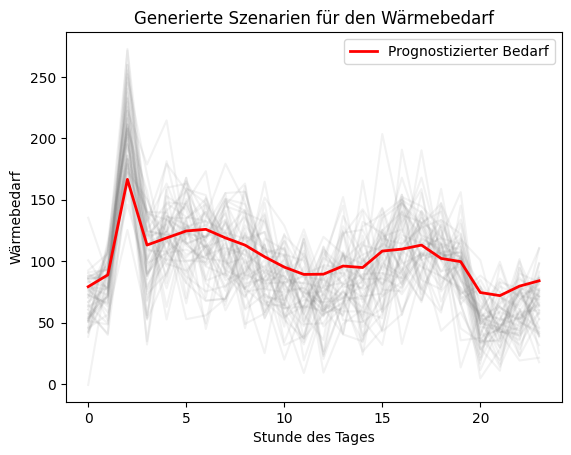

In [10]:
plt.plot(scenarios.T, color='grey', alpha=0.1)  # alle Szenarien plotten
plt.plot(daily_date['forecast_demand'], color='red', linewidth=2, label='Prognostizierter Bedarf')
plt.xlabel('Stunde des Tages')
plt.ylabel('Wärmebedarf')
plt.title('Generierte Szenarien für den Wärmebedarf')
plt.legend()
plt.show()

---

## Second Methode: Monte Carlo Sampling and Roulette Wheel Mechanism


In [11]:
# number of intervals
num_intervals = 7  
intervals = np.linspace(mu_all - 3*sigma_all, mu_all + 3*sigma_all, 8)
interval_centers = (intervals[:-1] + intervals[1:]) / 2  
print('Intervals:',intervals)
print('Interval Centers:',interval_centers)

# calculate the probabilities
probabilities = [stats.norm.cdf(intervals[i+1], mu_all, sigma_all) - stats.norm.cdf(intervals[i], mu_all, sigma_all) for i in range(len(intervals)-1)]
cum_probabilities = np.cumsum(probabilities)

# print the probabilities
print('Probabilities:',probabilities)
print('Edge on Scale 0.XX-0.99X Probabilities:',cum_probabilities)

# Function to randomly select an interval based on the CDF

def select_interval(cumulative_probabilities):
    rnd = random.random()
    for i, cp in enumerate(cumulative_probabilities):
        if rnd <= cp:
            return i
    return len(cumulative_probabilities) - 1


# Generate scenarios
T = 24  # Number of time steps
scenarios = []
heat_demand_data = {} # Dictionary to store the heat demand data
for _ in range(num_scenarios):
    scenario = []
    for t in range(T):
        interval_index = select_interval(cum_probabilities)
        scenario.append(interval_centers[interval_index])
    scenarios.append(scenario)

    
# Calculate normed probability for each scenario
scenario_probabilities = np.prod([[probabilities[select_interval(cum_probabilities)] for _ in range(T)] for _ in range(num_scenarios)], axis=1)
normalized_probabilities = scenario_probabilities / scenario_probabilities.sum()

# Convert scenarios to DataFrame for better visualization
scenarios_mu_df = pd.DataFrame(scenarios, columns=[f'Time_{t}' for t in range(T)])
probabilities_df = pd.DataFrame(normalized_probabilities, columns=['Probability'])

for i in range(num_scenarios):
    scenario_name = f'Scenario_{i+1}'
    heat_demand_data[scenario_name] = {
        'Probability': normalized_probabilities[i],
        'Heat Demand': scenarios[i]
    }


Intervals: [-102.65536316  -75.72246025  -48.78955734  -21.85665444    5.07624847
   32.00915138   58.94205428   85.87495719]
Interval Centers: [-89.1889117  -62.2560088  -35.32310589  -8.39020298  18.54269992
  45.47560283  72.40850574]
Probabilities: [0.014712387572198223, 0.08320911123950271, 0.2348461740542938, 0.33176485820475055, 0.23484617405429364, 0.0832091112395027, 0.014712387572198171]
Edge on Scale 0.XX-0.99X Probabilities: [0.01471239 0.0979215  0.33276767 0.66453253 0.89937871 0.98258782
 0.9973002 ]


In [12]:
# Number of intervals
num_intervals = 7

# Store the data
scenarios_df = []
heat_demand_data = {}

# Generate scenarios
scenarios=[]
scenario_probabilities = []
actual_demand = []



# Function to randomly select an interval based on the CDF
def select_interval(cumulative_probabilities):
    rnd = random.random()
    for i, cp in enumerate(cumulative_probabilities):
        if rnd <= cp:
            return i
    return len(cumulative_probabilities) - 1


# Generate intervals

for _ in range(num_scenarios):
    scenario_name = f"Scenario {i+1}"
    scenario = []
    scenario_probability = 1
    for t in range(len(daily_date)):

        mu = error_dict[t]['mu']
        sigma = error_dict[t]['sigma']
        #print(f'Mean:{t} {mu} Standard Deviation:{t} {sigma}')

        # Define the intervals
        intervals = np.linspace(mu - 3*sigma, mu + 3*sigma, num_intervals + 1)
        #print(f'Interval:{t} {intervals}')
        interval_centers  = (intervals[:-1] + intervals[1:]) / 2
        #print(f'Interval Centers:{t} {interval_centers}')

        probabilities = [
                stats.norm.cdf(intervals[i + 1], mu, sigma) - stats.norm.cdf(intervals[i], mu, sigma) 
                for i in range(len(intervals) - 1)
            ]
        #print(f'Probabilities:{t} {probabilities}')
        cum_probabilities = np.cumsum(probabilities)
        #print(f'Cumulative Probabilities:{t} {cum_probabilities}')

        # Select interval index based on cumulative probabilities
        interval_index = select_interval(cum_probabilities)
        #print(probabilities[interval_index])
        #print(interval_index)   

        # Append selected center to the scenario
        #print(interval_centers[interval_index])
        forecast_error = interval_centers[interval_index]
        actual_demand = daily_date['forecast_demand'][t] + forecast_error
        scenario.append(actual_demand)
        scenario_probability *= probabilities[interval_index]
        #print(f'Scenrio Probability: {scenario_probability}')
        
    # Store the scenario
    heat_demand_data[scenario_name] = {
        "Probability": scenario_probability,
        **{t: value for t, value in enumerate(scenario)}
    }

print(heat_demand_data)

scenario_probabilities  

# Normalizing the scenario probabilities
total_probability = sum(scenario_probabilities) 
normalized_scenario_probabilities = [p / total_probability for p in scenario_probabilities]

# Output scenarios and their normalized probabilities
for i, (scenario, prob) in enumerate(zip(scenarios, normalized_scenario_probabilities)):
    print(f"Scenario {i+1}: {scenario}")
    print(f"Normalized Probability: {prob:.4f}")
# Calculate the Probability of each scenario
#print('Scenarios:',scenarios)
#print('Scenario Probabilities:',scenario_probabilities)

#scenario_probabilities



{'Scenario 50': {'Probability': 7.780360588196645e-19, 0: 130.85871455895057, 1: 102.2365303301181, 2: 205.25278568015838, 3: 71.14972861558154, 4: 97.98019618720105, 5: 95.21445956957622, 6: 89.68678527464209, 7: 162.98009230878097, 8: 133.78599082821736, 9: 93.72499111480572, 10: 50.859106745076616, 11: 30.62573382865976, 12: 50.05142334527024, 13: 108.22430779880499, 14: 4.405890721822985, 15: 124.39318230920189, 16: 102.56346993215129, 17: 80.94282610549922, 18: 81.86713330208153, 19: 93.8962539339735, 20: 17.718673549892436, 21: 35.60999678203349, 22: 38.432899173316926, 23: 65.42417526203123}}


In [13]:
import numpy as np
import random
from scipy import stats

# Number of intervals
num_intervals = 7

# Store the data
scenarios = []
scenario_probabilities = []
heat_demand_data = {}


# Function to randomly select an interval based on the CDF
def select_interval(cumulative_probabilities):
    rnd = random.random()
    for i, cp in enumerate(cumulative_probabilities):
        if rnd <= cp:
            return i
    return len(cumulative_probabilities) - 1

# Generate scenarios
for scenario_index in range(num_scenarios):
    scenario_name = f"Scenario{scenario_index + 1}"
    scenario = []
    scenario_probability = 1
    
    for t in range(len(daily_date)):
        mu = error_dict[t]['mu']
        sigma = error_dict[t]['sigma']
        
        # Define the intervals
        intervals = np.linspace(mu - 3 * sigma, mu + 3 * sigma, num_intervals + 1)
        interval_centers = (intervals[:-1] + intervals[1:]) / 2
        
        # Calculate probabilities for each interval
        probabilities = [
            stats.norm.cdf(intervals[i + 1], mu, sigma) - stats.norm.cdf(intervals[i], mu, sigma)
            for i in range(len(intervals) - 1)
        ]
        cum_probabilities = np.cumsum(probabilities)
        
        # Select interval index based on cumulative probabilities
        interval_index = select_interval(cum_probabilities)
        
        # Calculate forecast error and add to forecast demand
        forecast_error = interval_centers[interval_index]
        actual_demand = forecast_demand[t] + forecast_error
        scenario.append(actual_demand)
        
        # Multiply the probability of this interval to the scenario probability
        scenario_probability *= probabilities[interval_index]
    
    # Store the scenario and its probability in the dictionary
    heat_demand_data[scenario_name] = {
        "Probability": scenario_probability,
        **{int(t): value for t, value in enumerate(scenario)}
    }
    # Collect scenario probabilities for normalization
    scenario_probabilities.append(scenario_probability)

# Normalizing the scenario probabilities
total_probability = sum(scenario_probabilities)
for scenario_name in heat_demand_data:
    heat_demand_data[scenario_name]["Probability"] /= total_probability

#heat_demand_data

#Output the scenarios and their normalized probabilities
for scenario_name, data in heat_demand_data.items():
    print(f"{scenario_name}:")
    print(f"  Normalized Probability: {data['Probability']:.4f}")
    print(f"  Values: {[data[t] for t in range(len(daily_date))]}")


Scenario1:
  Normalized Probability: 0.0000
  Values: [66.52477786895167, 35.92498651545151, 239.59182366916397, 71.14972861558154, 149.22277293744463, 95.21445956957622, 89.68678527464209, 110.02300859269768, 158.7240746430838, 64.59687634134171, 50.859106745076616, 77.42858686630458, 99.99227020930516, 61.84424185305396, 29.801037518583215, 95.95006267421034, 130.6508847462247, 108.77300716275587, 128.91238873736586, 32.46093648761578, 72.62203762986137, 18.560395127447777, 78.77369312456331, 45.21040051314371]
Scenario2:
  Normalized Probability: 0.0007
  Values: [87.96942343228466, 80.1326823918959, 170.91374769115282, 163.4540066490809, 200.4653496876882, 147.7145193825191, 89.68678527464209, 110.02300859269768, 108.84790701335089, 64.59687634134171, 50.859106745076616, 54.02716034748218, 75.02184677728769, 85.03427482592947, 55.196184315343466, 124.39318230920189, 46.3886403040045, 136.60318822001253, 128.91238873736586, 73.41781478518759, 36.01979490988208, 35.60999678203349, 58

In [14]:
# Speichern des Dictionaries in einer JSON-Datei

filename = 'heat_demand_scenarios.json'
file = f'{OUTPUT_PATH}{filename}'

with open(file, 'w') as json_file:
    json.dump(heat_demand_data, json_file, indent=4)

# Laden des Dictionaries aus der JSON-Datei
with open(file, 'r') as json_file:
    loaded_data = json.load(json_file)

print(loaded_data)

{'Scenario1': {'Probability': 4.5571905089675456e-05, '0': 66.52477786895167, '1': 35.92498651545151, '2': 239.59182366916397, '3': 71.14972861558154, '4': 149.22277293744463, '5': 95.21445956957622, '6': 89.68678527464209, '7': 110.02300859269768, '8': 158.7240746430838, '9': 64.59687634134171, '10': 50.859106745076616, '11': 77.42858686630458, '12': 99.99227020930516, '13': 61.84424185305396, '14': 29.801037518583215, '15': 95.95006267421034, '16': 130.6508847462247, '17': 108.77300716275587, '18': 128.91238873736586, '19': 32.46093648761578, '20': 72.62203762986137, '21': 18.560395127447777, '22': 78.77369312456331, '23': 45.21040051314371}, 'Scenario2': {'Probability': 0.0007244629527061806, '0': 87.96942343228466, '1': 80.1326823918959, '2': 170.91374769115282, '3': 163.4540066490809, '4': 200.4653496876882, '5': 147.7145193825191, '6': 89.68678527464209, '7': 110.02300859269768, '8': 108.84790701335089, '9': 64.59687634134171, '10': 50.859106745076616, '11': 54.02716034748218, '1

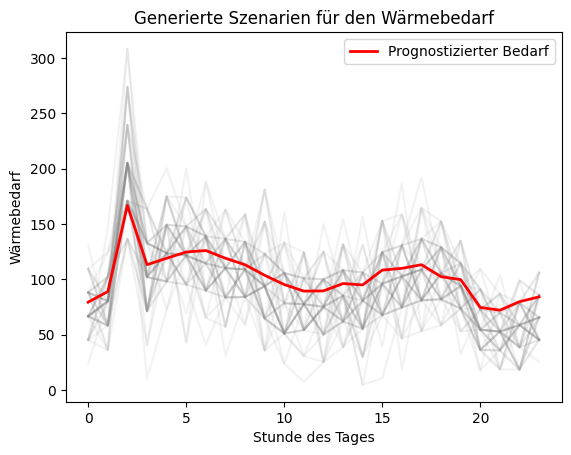

In [15]:
# Convert scenarios to DataFrame for plotting
scenarios_df = pd.DataFrame({name: data for name, data in heat_demand_data.items()}).drop('Probability').T

# Plot all scenarios and forecast demand
plt.plot(scenarios_df.T, color='grey', alpha=0.1)  # alle Szenarien plotten
plt.plot(daily_date['forecast_demand'], color='red', linewidth=2, label='Prognostizierter Bedarf')
plt.xlabel('Stunde des Tages')
plt.ylabel('Wärmebedarf')
plt.title('Generierte Szenarien für den Wärmebedarf')
plt.legend()
plt.show()

## Szenarien Reduktion

In [16]:
# Importing the libraries

from sklearn.cluster import KMeans
from scipy.stats import entropy

In [17]:
# # Es gibt X Szenarien. Für jedes Szenario soll ein data-Dictionary erstellt werden.
# # t: Zeitpunkt des Tages, ist über alle Szenarien gleich.
# # heat_demand ist über alle Szenarien gleich.
# # heat_demand_s ist der heat_demand des szenarios und ist für jedes Szenario unterschiedlich.
# # delta_heat_demand ist die Differenz zwischen heat_demand_s und heat_demand.
# # probability ist die Wahrscheinlichkeit des Szenarios.

data = { None: {
    't':{ None: [1,2,3, ... 24]},
    'heat_demand': {1: Wert1, 2: Wert2, ... 24: Wert24},
    'heat_demand_s': {1: Wert1, 2: Wert2, ... 24: Wert24},
    'delta_heat_demand': {1: Wert1, 2: Wert2, ... 24: Wert24},
    'probability':{None: Wert}
         }
}}

# # Ziel ist es die vorgegebene data-dictionary Struktur zu erstellen und quasi für jedes Szenario zu füllen.

# #t und heat_demand sind im heat_demand_20230402.json File enthalten.
# #heat_demand_s und probability sind im heat_demand_scenarios_20230402.json File enthalten.
# #delta_heat_demand kann aus den beiden Files berechnet werden.

# Hilf mir dabei. 




SyntaxError: invalid syntax (2941273611.py, line 9)

### Backward Scenario Reduction Methode
Ergänzen.

### Improved k-means Clustering

Ergänzen.